In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import plotly.offline as py 
import seaborn as sns 

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

MOUNT DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOAD DATASET**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.menu_item

0        []
1        []
2        []
3        []
4        []
         ..
51712    []
51713    []
51714    []
51715    []
51716    []
Name: menu_item, Length: 51717, dtype: object

ADD COLUMN DESCRIPTION

In [5]:
print(data.shape)
print(data.dtypes)
#cost : obj to int

(51717, 17)
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df = data.drop(['url','phone'], axis =1)

**Checking Duplicates**

In [8]:
df.duplicated().sum()

43

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

**Drop Null Values**

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Renaming columns**

In [12]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
df = df.rename(columns = {'approx_cost(for two people)':'cost',
                          'listed_in(type)' : 'type',
                          'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

**DATA CLEANING**

In [14]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [15]:
df.cost = df.cost.astype(str)
df.cost = df.cost.apply(lambda x: x.replace(",",""))
df.cost = df.cost.astype(float)

In [16]:
df.cost.dtype

dtype('float64')

In [17]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
df = df.loc[df.rate != 'NEW']

In [19]:
df.rate = df.rate.apply(lambda x: x.replace('/5', ""))
df.rate = df.rate.astype(float)

In [20]:
df.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
df.menu_item
# Empty list

0        []
1        []
2        []
3        []
4        []
         ..
51705    []
51707    []
51708    []
51711    []
51715    []
Name: menu_item, Length: 23248, dtype: object

In [22]:
df = df.drop(columns = 'menu_item', axis =1)

# Visualisations

Most famous restraunts chains in Bangaluru

In [23]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


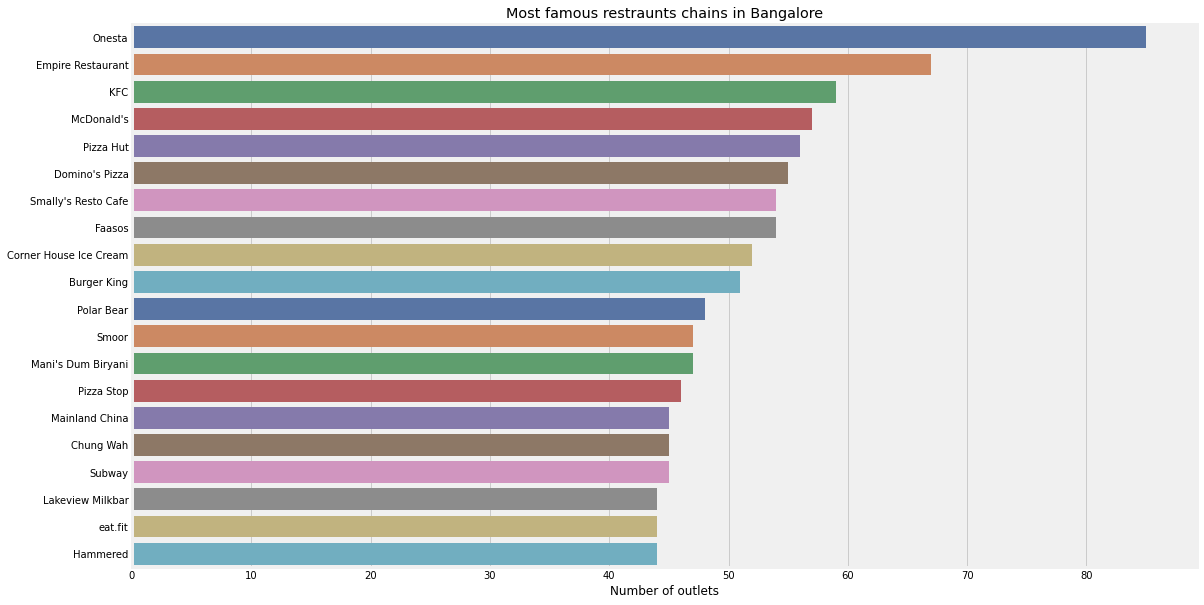

In [24]:
plt.figure(figsize=(17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restraunts chains in Bangalore")
plt.xlabel('Number of outlets')
plt.show()

**Table Booking Ratio**

In [25]:
x=df.book_table.value_counts()
colors = ['#800080','000070']

trace = go.Pie(labels=x.index,values=x,textinfo = 'value',
                marker = dict(colors=colors, line=dict(color='#001000',width=2)))
layout=go.Layout(title="Table booking", width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename='pie_chart_subplots')

Restraunts deliver online?

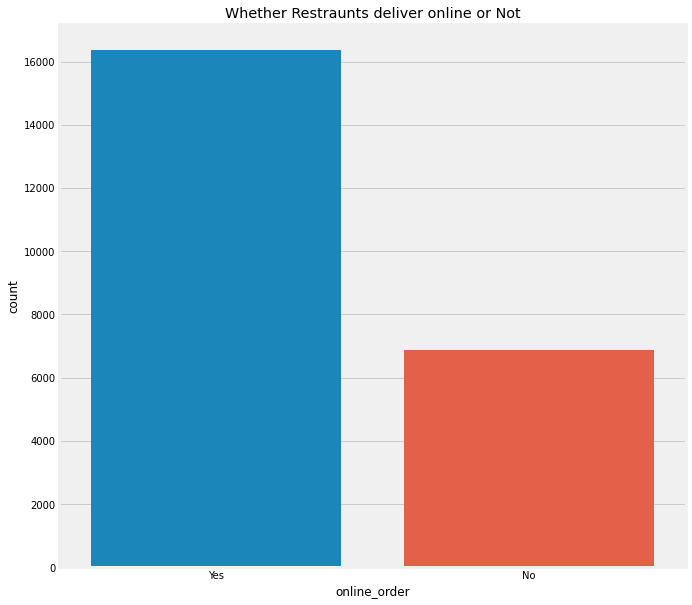

In [26]:
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Whether Restraunts deliver online or Not")
plt.show()


# Rating Distributions

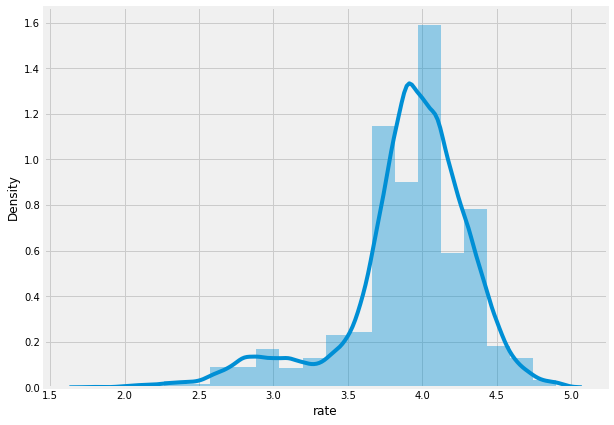

In [27]:
#How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df.rate,bins=20)

**Count ratings between "1 and 2", "2 and 3","3 and 4" and "4 and 5"**

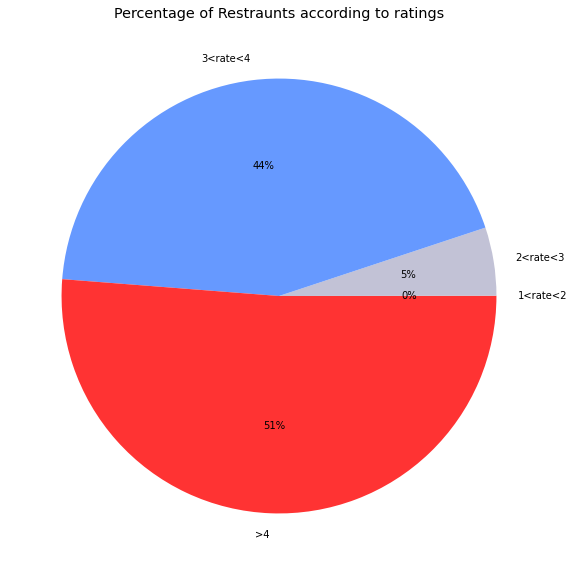

In [28]:
slices = [((df.rate >= 1) & (df.rate < 2)).sum(),
           ((df.rate >= 2) & (df.rate < 3)).sum(),
           ((df.rate >= 3) & (df.rate < 4)).sum(),
           (df.rate >= 4).sum()
           ]

labels=['1<rate<2', '2<rate<3', '3<rate<4', '>4']
colors = ['#ff3333', '#c2c2d6', '#6699ff']
plt.pie(slices, colors=colors, labels=labels, autopct='%1.0f%%')
fig=plt.gcf()
plt.title('Percentage of Restraunts according to ratings')

fig.set_size_inches(10,10)
plt.show()

Service Type

Text(0.5, 1.0, 'Service Type')

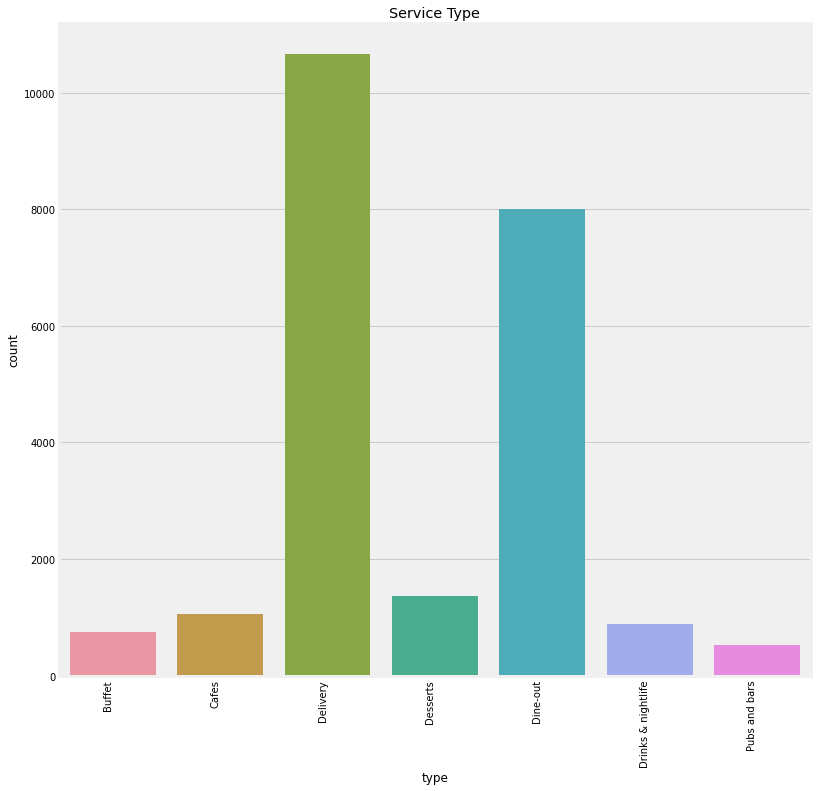

In [29]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation = 90,ha='right')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title("Service Type")


Two main types: Delivery, Dine-out

# Distribution of Cost of Food for two People

In [30]:
from plotly.offline import iplot

In [31]:
trace0 = go.Box(y=df['cost'], name='accepting online orders', marker=dict(color = 'rgb(113,10,100)'))
data=[trace0]
layout=go.Layout(title='Box plot of approximate cost', width=800,height=800,yaxis=dict(title='Price'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

**Distribution of charges**

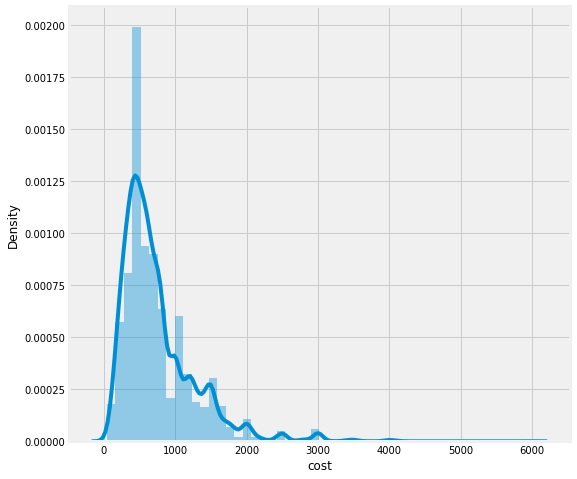

In [32]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

# Most Liked Dishes

In [33]:
import re

df.index = range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
  array_split=re.split(',', df['dish_liked'][i])
  for item in array_split:
    likes.append(item.strip())

In [34]:
df.index = range(df.shape[0])
df.index

RangeIndex(start=0, stop=23248, step=1)

In [35]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Pasta               3349
Burgers             2992
Cocktails           2771
Pizza               2662
Biryani             2056
Coffee              1985
Mocktails           1854
Sandwiches          1657
Paratha             1529
Salads              1386
Noodles             1371
Fish                1327
Nachos              1324
Chicken Biryani     1303
Beer                1227
Mutton Biryani      1090
Tea                 1028
Thali                996
Rolls                981
Fries                964
Waffles              964
Butter Chicken       950
Momos                927
Sea Food             926
Chaat                901
Sandwich             881
Roti                 851
Tandoori Chicken     850
Brownie              832
Lassi                825
dtype: int64

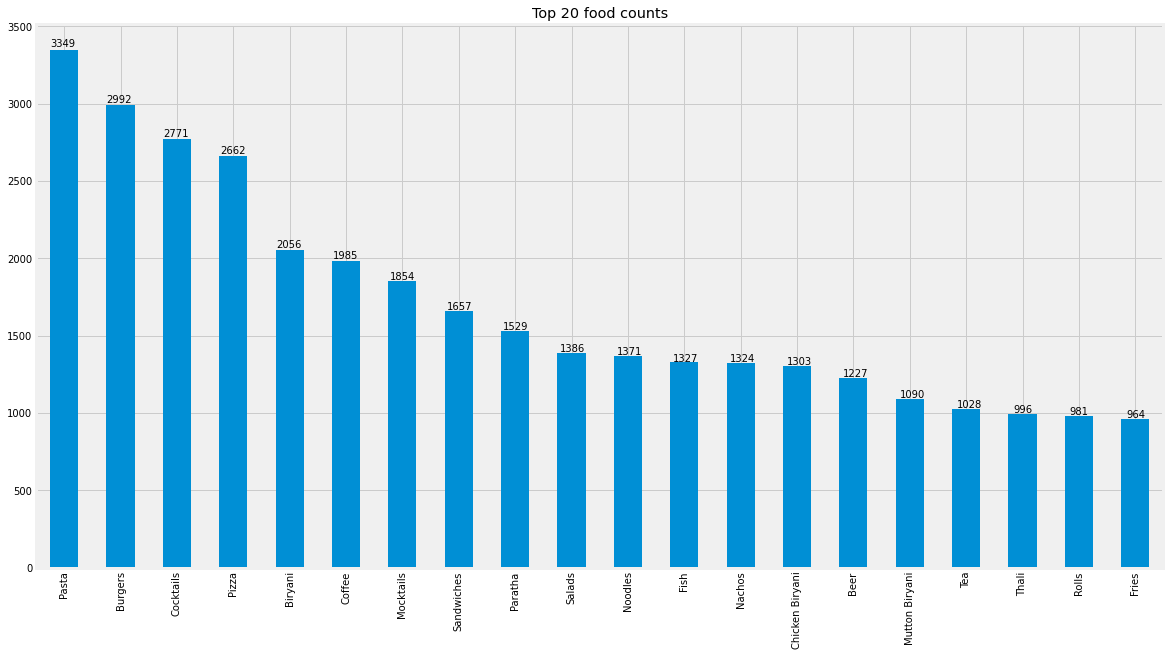

In [36]:
ax= favourite_food.nlargest(n=20, keep='first').plot(kind='bar', figsize=(18,10), title="Top 20 food counts")
for i in ax.patches:
  ax.annotate(str(i.get_height()), (i.get_x()*1.005, i.get_height()*1.005))


5 Most liked Dishes: Pizza, Pasta, Cocktails, Burgers and Mocktails

Restutrants and their counts

Text(0.5, 0, 'count')

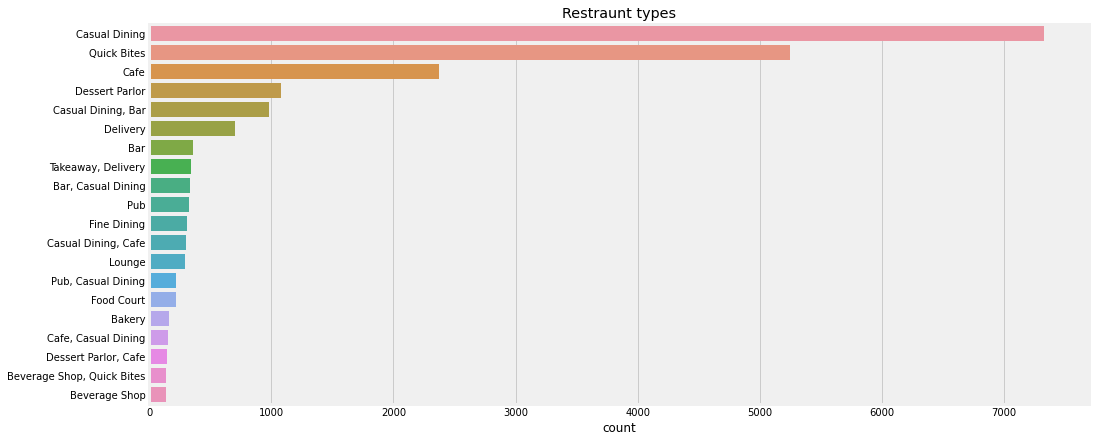

In [37]:
plt.figure(figsize=(15,7))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title('Restraunt types')
plt.xlabel('count')

Casual Dining, Quick Bites and Cafes are 3 most common types

In [38]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


# Convert categorical variables into numeric format

In [39]:
df.online_order[df.online_order == 'Yes']=1
df.online_order[df.online_order == 'No']=0

In [40]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [41]:
df.online_order = pd.to_numeric(df.online_order)

# Change the string categorical into int

In [42]:
df.book_table[df.book_table== 'Yes']=1
df.book_table[df.book_table== 'No']=0

In [43]:
df.book_table = pd.to_numeric(df.book_table)

In [44]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

Label encode the categorical variables to make it easier to build algoritm

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
f = df.copy()

In [67]:
df = f.copy()

AttributeError: ignored

In [68]:
df.location = le.fit_transform(df.location)
loc=[]
for row in df.location:
  temp = le.inverse_transform([row])
  loc.append((temp[0],row))

df.rest_type = le.fit_transform(df.rest_type)

type_of_rest=[]
for row in df.rest_type:
  temp = le.inverse_transform([row])
  type_of_rest.append((temp[0],row))

df.cuisines = le.fit_transform(df.cuisines)

cuisines=[]
for row in df.cuisines:
  temp = le.inverse_transform([row])
  cuisines.append((temp[0],row))

In [69]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,1,3.8,128,84,5,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",1318,1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield
23244,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,84,38,Rooftop Ambience,878,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield
23245,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,0,2.8,161,84,21,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...",539,1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield
23246,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,84,21,"Biryani, Andhra Meal",80,800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield


In [70]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10]]
my_data.to_csv('Zomato_df.csv')

In [71]:
x = df.iloc[:,[2,3,5,6,7,9,10]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,1,1,775,1,20,1386,800.0
1,1,0,787,1,20,594,800.0
2,1,0,918,1,16,484,800.0
3,0,0,88,1,62,1587,300.0
4,0,0,166,4,20,1406,600.0


In [72]:
y = df['rate']

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3, random_state=10)

# Linear Regression

In [74]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [75]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(x_test) 
r2_score(y_test,y_pred)

0.22793110062201383

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=650, random_state=245,min_samples_leaf=0.0001)
rf_model.fit(x_train,y_train)
y_pred= rf_model.predict(x_test)
r2_score(y_test,y_pred)

0.8876221612791518

# ExtraTree Regressor

In [77]:
et_model = ExtraTreesRegressor(n_estimators=120)
et_model.fit(x_train,y_train)
y_pred = et_model.predict(x_test)
r2_score(y_test,y_pred)

0.9404830689780027

# Saving Model

In [78]:
import pickle
pickle.dump(et_model, open('zomato.pkl','wb'))